# Dependencias y funciones

In [58]:
import requests
import base64
import io
import IPython.display
import pandas as pd
from PIL import Image
from datetime import datetime
from IPython.display import Markdown

In [59]:
def call(path_to_file='/home/francisco/Documentos/tfm/utils/sample.jpg', url="http://ec2-15-188-9-114.eu-west-3.compute.amazonaws.com:60210/detection"):

    payload = {'flags': [0,0,0,0,0], 'id': -1}
    files = [
        ('file', open(path_to_file,'rb'))
    ]
    headers= {}

    response = requests.request("POST", url, headers=headers, data = payload, files = files)

    return response

# Llamada a la API

In [3]:
response = call(path_to_file='./utils/sample.jpg', url="http://ec2-15-188-9-114.eu-west-3.compute.amazonaws.com:60210/detection")

In [60]:
response = call(path_to_file='./utils/sample.jpg', url="http://localhost:60210/detection")

In [182]:
response = call(path_to_file='./utils/sample.jpg', url="http://thewhitehonet.ddns.net:60210/detection")

In [44]:
response = call(path_to_file='./utils/sample.jpg', url="http://tfm-lb-1184677499.eu-west-3.elb.amazonaws.com/detection")

In [61]:
data = response.json()
print(f"Request time: {data['elapsed']}s")
print(f"Request init: {data['init']}")
print(f"Request end: {data['end']}")

Request time: 4.617s
Request init: 2021-01-08 06:29:47.887618
Request end: 2021-01-08 06:29:52.504371


In [64]:
from pprint import pprint 
data

{'response': {'id': 'f368dd38-4e59-4dea-8e78-b672ffaa088c',
  'response_detection': {'elapsed': 2.246},
  'response_rekognition': {'elapsed': 2.362},
  'response_processing': {'payload': {'user': 'CALZADOS M&N',
    'matches': [[0, 'CALZADOS M&N', 'CALZADOS M&N'],
     [4, 'CALZADOS M&N', 'CALZADOS'],
     [7, "LETICIA'S", 'LSC'],
     [7, "LETICIA'S", 'LEE'],
     [7, 'LOS AMIGOS', 'AR LOS'],
     [7, "LETICIA'S", 'LSC'],
     [7, "LETICIA'S", 'LEE'],
     [7, 'LOS AMIGOS', 'LOS'],
     [8, "LETICIA'S", 'AR'],
     [9, 'CALZADOS M&N', 'M&N']],
    'messages': {'application': [],
     'publications': [{'content': '¡Rebajas de enero!\n\nAprovecha esta gran oportunidad llevándote zapatos de piel de manufactura artesanal a mitad de precio.\n\nCORREEEEE 🏃🏻\u200d♂️🏃🏻\u200d♀️',
       'date': 1610065293},
      {'content': 'El tiempo estimado de espera en este establecimiento es de 10 minutos',
       'date': 1610072568}],
     'opinions': [{'content': '#fba_iot_tfm #CALZADOS_M&N Mientras es

# Tratamiendo de la respuesta

## Detección

Elapsed time: 6.87s
Confidence: 64 Class: 1
Confidence: 81 Class: 1
Confidence: 79 Class: 0


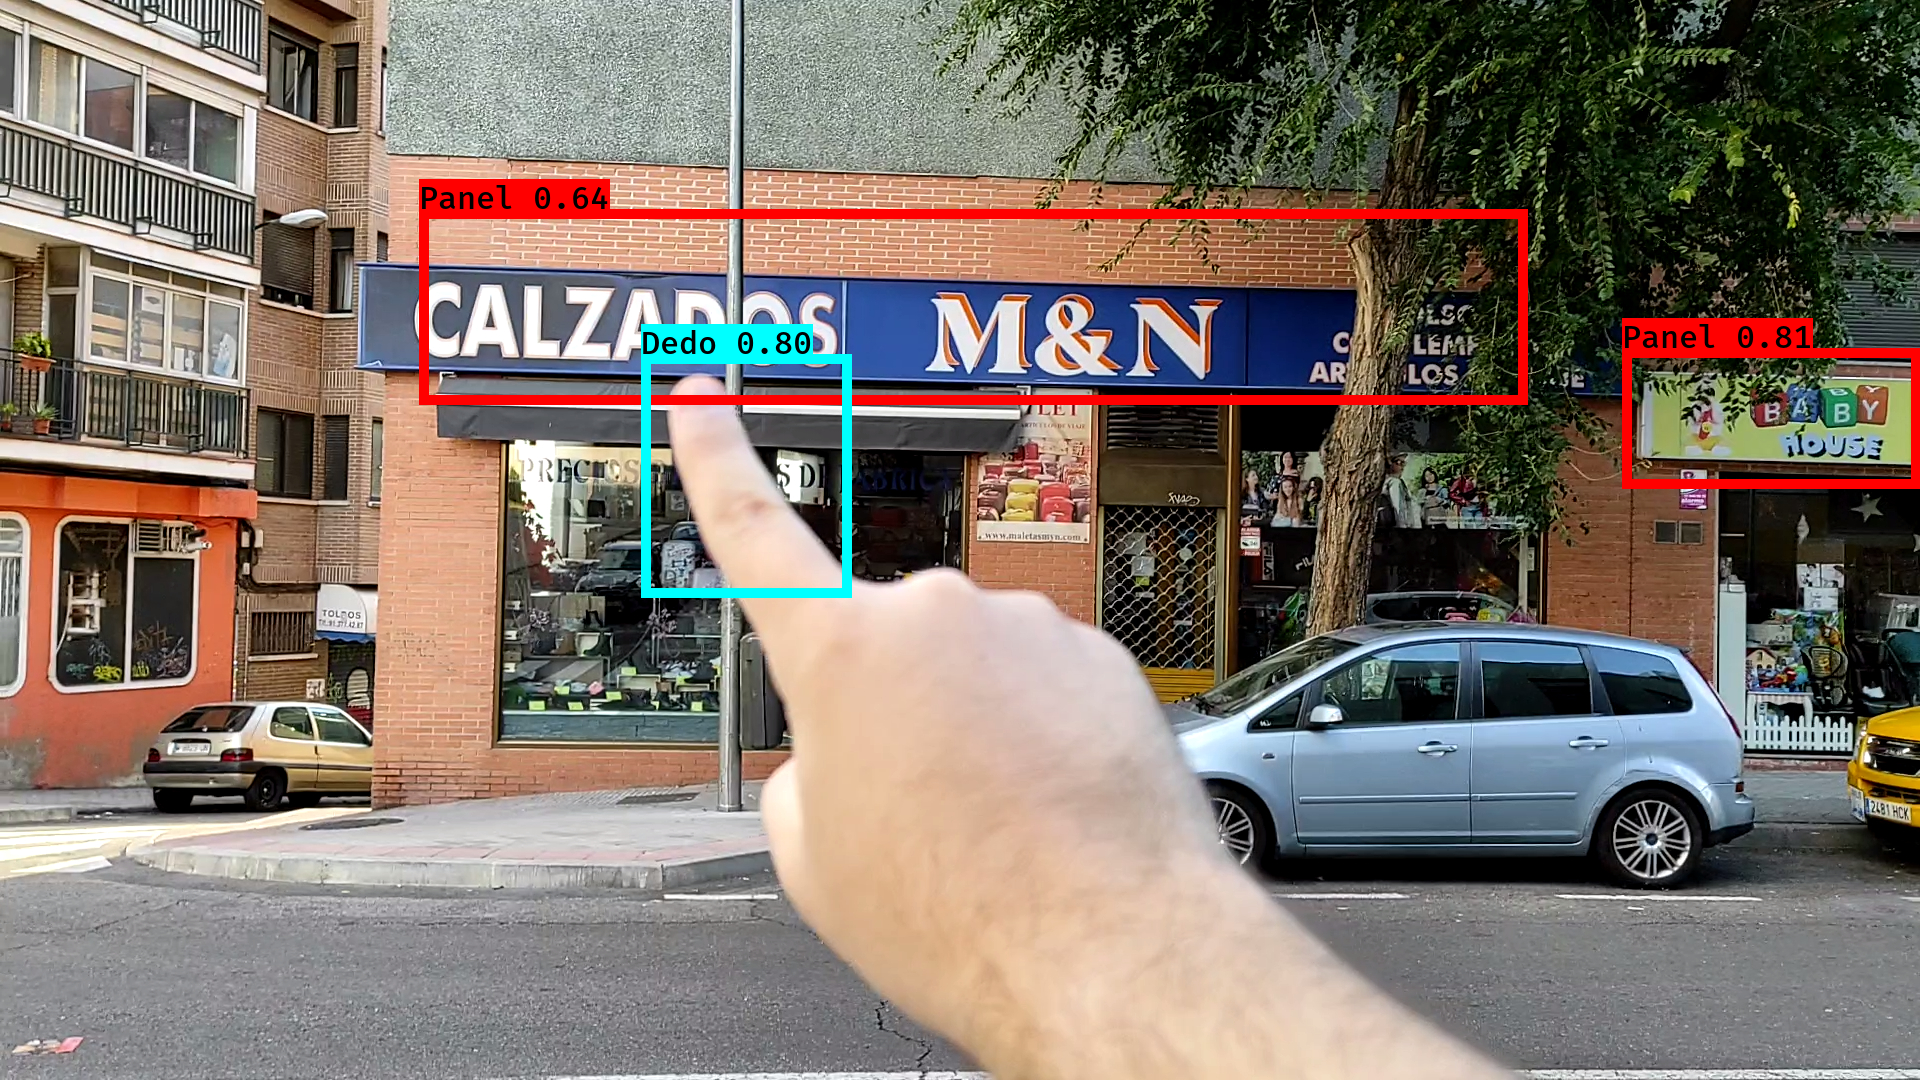

In [37]:
response_detection = data['response']['response_detection']
print(f"Elapsed time: {response_detection['elapsed']}s")
for p in response_detection['payload']['result'][0]['predictions']:
    print("Confidence: %d Class: %d" % (p[-2][-1], p[-2][0]))
msg = base64.b64decode(response_detection['payload']['result'][0]['image'])
buf = io.BytesIO(msg)
img = Image.open(buf)
IPython.display.Image(data=buf.getvalue())

## Reconocimiento

Elapsed time: 2.644s
OCR response
------------
CALZADOS M&N

LSC

LEE

AR LOS

CALZADOS

M&N

LSC

LEE

AR

LOS

*****
Image
-----


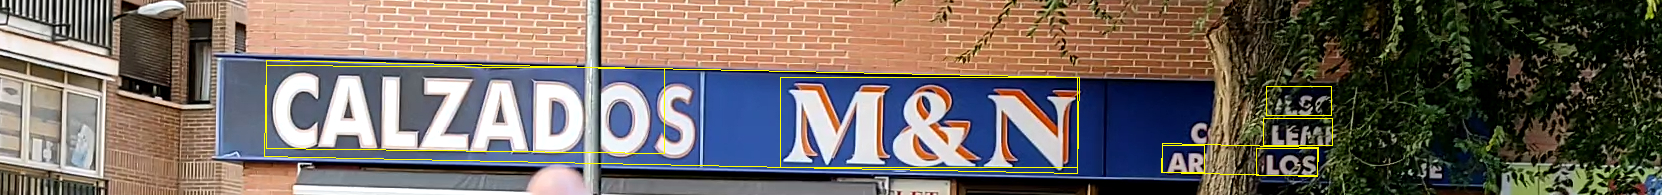

In [38]:
response_rekognition = data['response']['response_rekognition']
print(f"Elapsed time: {response_rekognition['elapsed']}s")
print("OCR response")
print("------------")
for item in response_rekognition['payload']['text']['TextDetections']:
    print(item['DetectedText']+'\n')
print("*****")
print("Image")
print("-----")
msg = base64.b64decode(response_rekognition['payload']['image'])
buf = io.BytesIO(msg)
img = Image.open(buf)
IPython.display.Image(data=buf.getvalue())

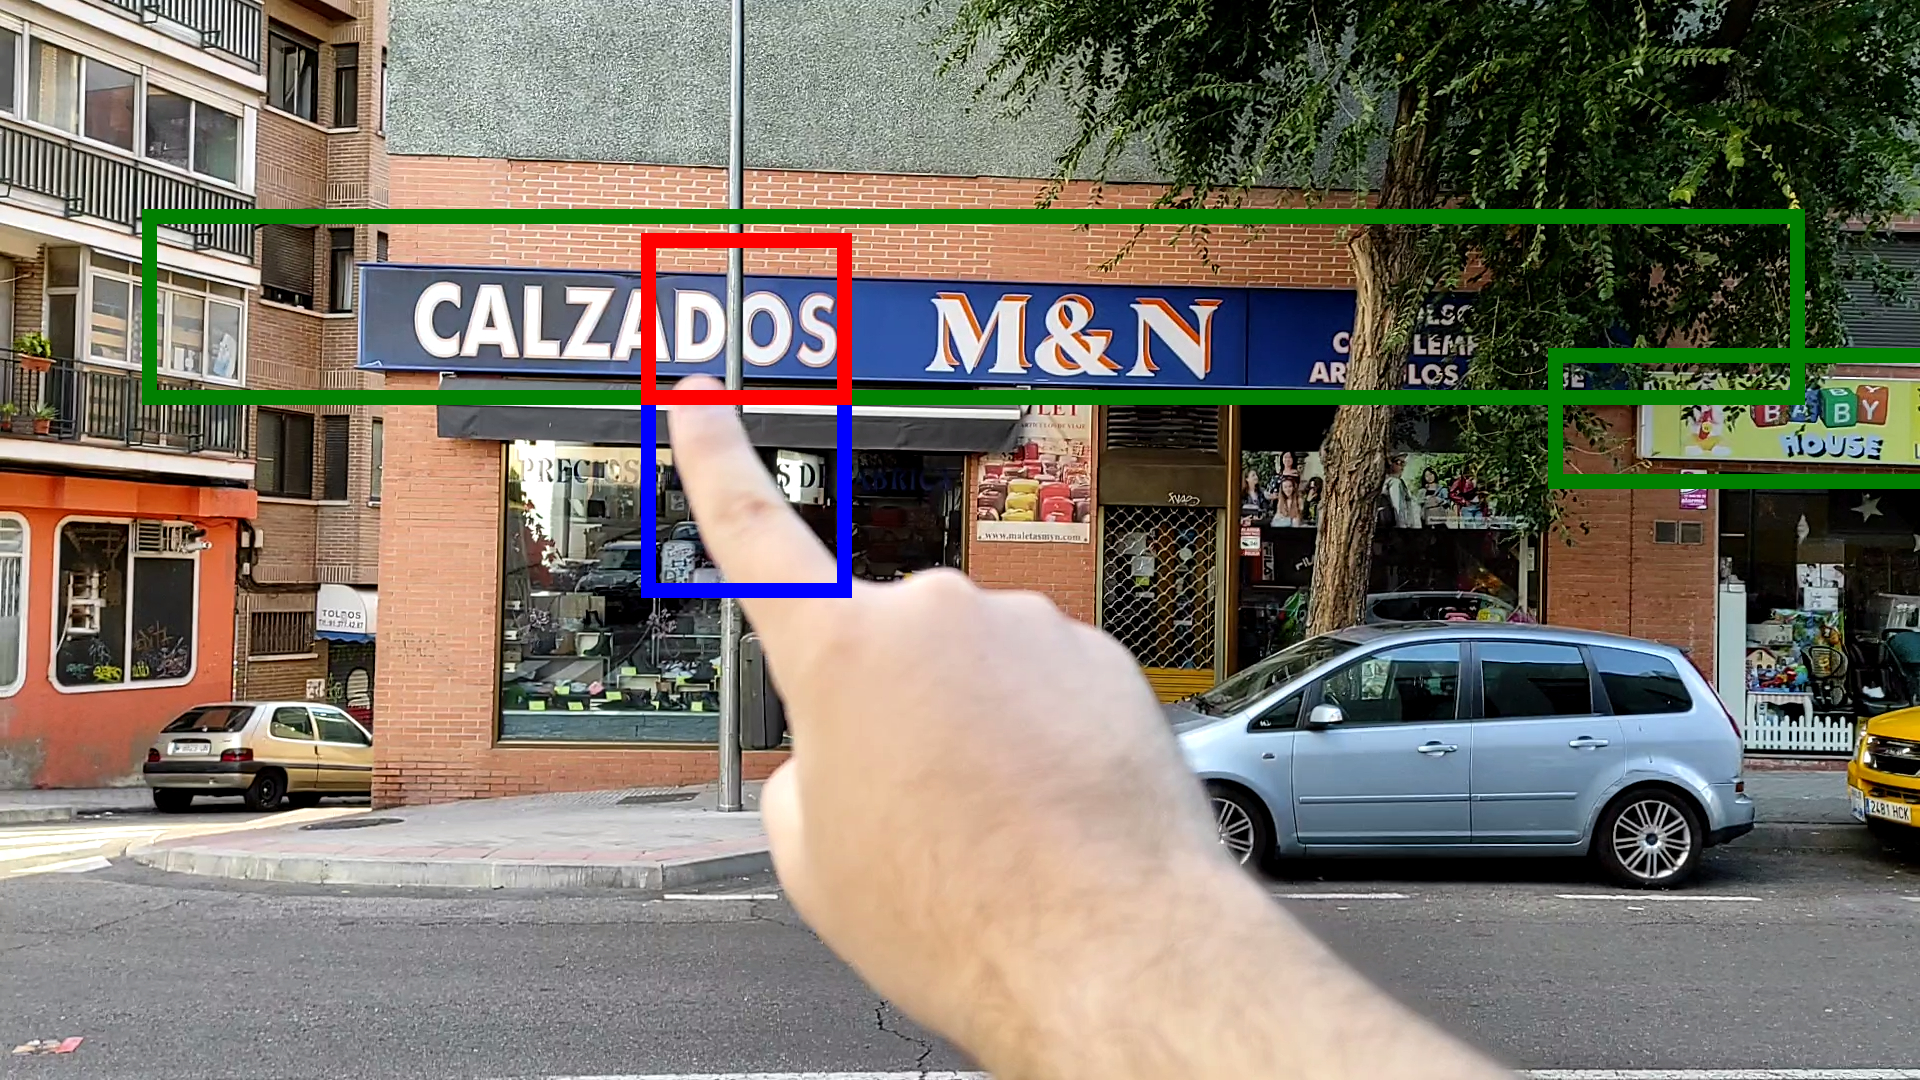

In [39]:
response_rekognition = data['response']['response_rekognition']
msg = base64.b64decode(response_rekognition['payload']['image_processed'])
buf = io.BytesIO(msg)
img = Image.open(buf)
IPython.display.Image(data=buf.getvalue())

## Procesamiento

In [40]:
response_processing = data['response']['response_processing']
print(f"Elapsed time: {response_processing['elapsed']}s")
print(f"Comprobaciones:")
txt = "Input OCR,Comercio,Distancia\n"
for item in response_processing['payload']['matches']:
    # print(f"Input OCR: {item[2]} Comercio: {item[1]} Distancia: {item[0]}")
    iitem = item.copy()
    iitem.reverse()
    txt += ','.join(list(map(lambda x: str(x), iitem))) + '\n'
print(pd.read_csv(io.StringIO(txt)))

Elapsed time: 0.031s
Comprobaciones:
      Input OCR      Comercio  Distancia
0  CALZADOS M&N  CALZADOS M&N          0
1      CALZADOS  CALZADOS M&N          4
2           LSC     LETICIA'S          7
3           LEE     LETICIA'S          7
4        AR LOS    LOS AMIGOS          7
5           LSC     LETICIA'S          7
6           LEE     LETICIA'S          7
7           LOS    LOS AMIGOS          7
8            AR     LETICIA'S          8
9           M&N  CALZADOS M&N          9


In [52]:

print("--------")
display(Markdown(f"**Usuario**: {response_processing['payload']['user']}"))
print("--------\n")
"""
print("Mensajes publicados por la aplicación")
print("--------")
for item in response_processing['payload']['messages']['application']:
    print(f"{item}")
    print("--------")
"""
display(Markdown("**Mensajes publicados**"))
print("--------")
for item in response_processing['payload']['messages']['publications']:
    #print(f"DATE: {datetime.fromtimestamp(item['date'])}")
    print(f"{item['content']}")
    print("--------")
display(Markdown("**Opiniones de usuarios**"))
print("--------")
for item in response_processing['payload']['messages']['opinions']:
    #print(f"DATE: {datetime.fromtimestamp(item['date'])}")
    print(f"{item['content']}")
    print("--------")
display(Markdown("**Datos de sensores**"))
print("--------")
for item in response_processing['payload']['messages']['sensors']:
    #print(f"DATE: {datetime.fromtimestamp(item['date'])}")
    for k, v in item['content'].items():
        print(f"{k}:{v}")
    print("--------")

--------


**Usuario**: CALZADOS M&N

--------



**Mensajes publicados**

--------
¡Rebajas de enero!

Aprovecha esta gran oportunidad llevándote zapatos de piel de manufactura artesanal a mitad de precio.

CORREEEEE 🏃🏻‍♂️🏃🏻‍♀️
--------
El tiempo estimado de espera en este establecimiento es de 10 minutos
--------


**Opiniones de usuarios**

--------
#fba_iot_tfm #CALZADOS_M&N Mientras esperaba a que comenzara el espectáculo de la plaza entré a esta zapatería.
--------
#fba_iot_tfm #CALZADOS_M&N Fantástica la oferta de enero. ¡¡¡No había visto nunca nada igual!!!
--------


**Datos de sensores**

--------
ambiance:22
ocupation:3
--------
